<a href="https://colab.research.google.com/github/Rocks-n-Code/PythonCourse/blob/master/KDE_is_not_Krig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KDE for contour maps?

[Original Article](https://y0gipamadya.medium.com/cara-simpel-contouring-elevasi-di-python-tanpa-menggunakan-interpolasi-mesh-gridded-kriging-a093cfbbfe18)

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
#from scipy.interpolate import griddata #not used?
import seaborn as sns

% matplotlib inline 

In [2]:
x = (np.random.triangular(10,50,100,20)).astype(int) 
y = (np.random.triangular(10,50,100,20)).astype(int) 
z = (np.random.triangular(10,50,100,20)).astype(int)

In [4]:
import pandas as pd
data = {'x': x, 'y': y, 'z': z} 
df = pd.DataFrame(data) 
df.head()

,x,y,z
0,73,72,54
1,43,48,82
2,54,50,57
3,26,16,25
4,46,54,42


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'y'), Text(0.5, 0, 'x'), Text(0.5, 1.0, 'Plot')]

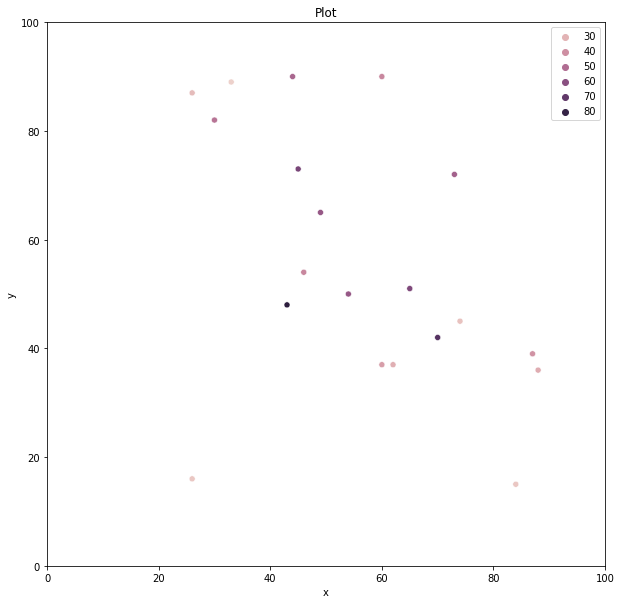

In [6]:
plt.figure(figsize = (10,10))
plt.ylim(0,100) 
plt.xlim(0,100)
ax = sns.scatterplot(x, 
                     y, 
                     hue=z) 
ax.set(xlabel='x', 
       ylabel='y', 
       title='Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'y'), Text(0.5, 0, 'x'), Text(0.5, 1.0, 'Contour')]

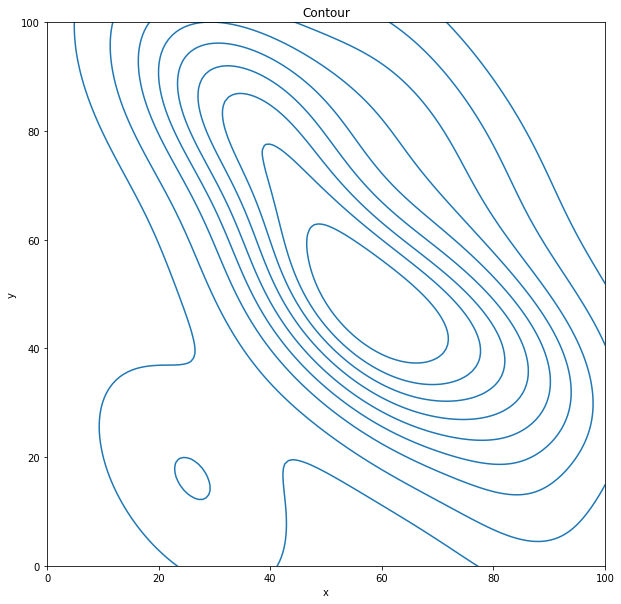

In [7]:
plt.figure(figsize = (10,10))
plt.ylim(0,100) 
plt.xlim(0,100)
ax = sns.kdeplot (x, y) 
ax.set(xlabel='x', 
       ylabel='y', 
       title='Contour')

In [8]:
X = np.repeat(x, z) 
Y = np.repeat(y, z)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'y'), Text(0.5, 0, 'x'), Text(0.5, 1.0, 'Contour')]

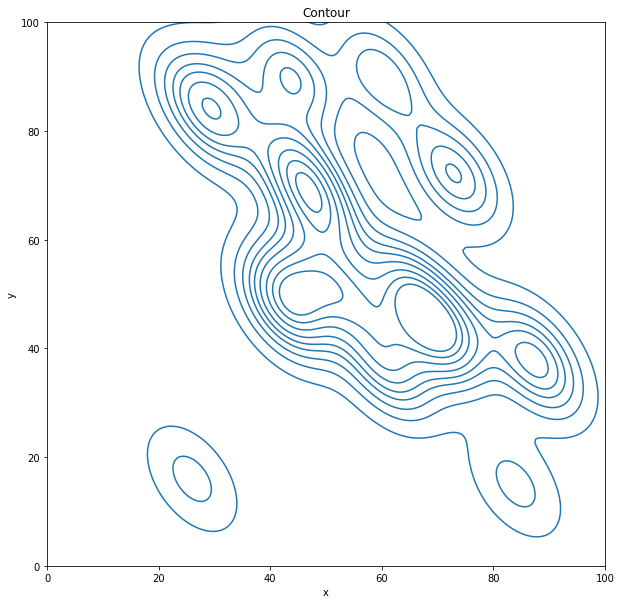

In [11]:
plt.figure(figsize = (10,10))
plt.ylim(0,100) 
plt.xlim(0,100)
ax = sns.kdeplot(X, Y) 
ax.set(xlabel='x', 
       ylabel='y', 
       title='Contour')

# Add an Outcrop
Ok, now let's watch the behavior of this combined plot if we add a bunch of theoretical measurments along a thin outcrop.



In [36]:
outcrop_z = np.random.random_integers(4,
                   size=(1400,))
outcrop_x = np.arange(18,25,0.005)
outcrop_y = np.arange(38,45,0.005)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 4 + 1) instead
  


In [37]:
#Combine them with the original measurements
combined_x = np.concatenate((x, outcrop_x))
combined_y = np.concatenate((y, outcrop_y))
combined_z = np.concatenate((z, outcrop_z))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'y'), Text(0.5, 0, 'x'), Text(0.5, 1.0, 'Plot')]

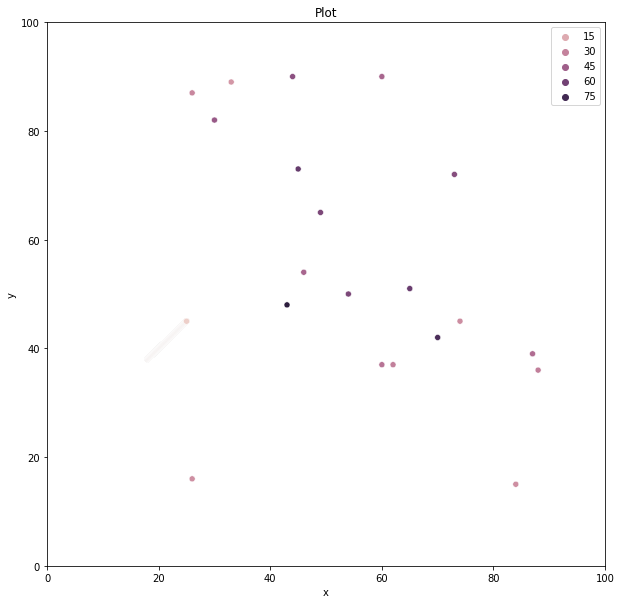

In [41]:
#Notice the low values of the outcrop
plt.figure(figsize = (10,10))
plt.ylim(0,100) 
plt.xlim(0,100)
ax = sns.scatterplot(combined_x, 
                     combined_y, 
                     hue=combined_z) 
ax.set(xlabel='x', 
       ylabel='y', 
       title='Plot')

In [38]:
# Repeat
combined_X = np.repeat(combined_x, combined_z)
combined_Y = np.repeat(combined_y, combined_z)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'y'), Text(0.5, 0, 'x'), Text(0.5, 1.0, 'Contour')]

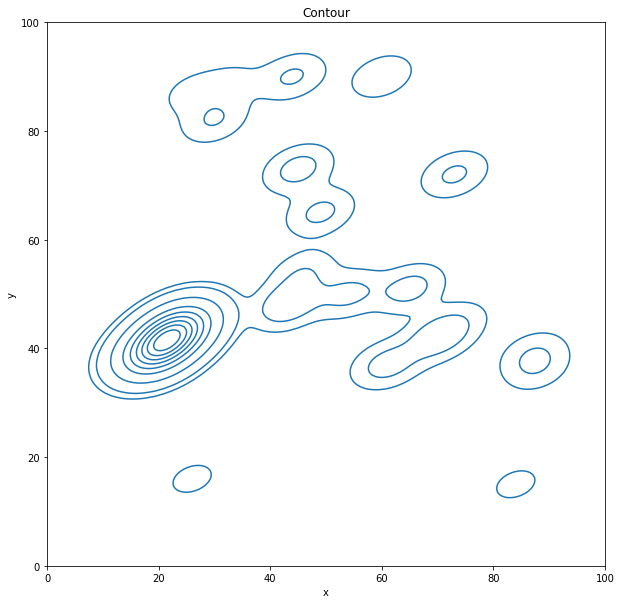

In [40]:
# New "combined"  KDE plot
plt.figure(figsize = (10,10))
plt.ylim(0,100) 
plt.xlim(0,100)
ax = sns.kdeplot(combined_X, combined_Y) 
ax.set(xlabel='x', 
       ylabel='y', 
       title='Contour')

In [45]:
z.mean(),outcrop_z.mean()

(44.85, 2.512857142857143)

Not that the thin outcrop with a high sample rate washes out effect of `np.repeat()` on the rest of the KDE plot with this method. If you were trying to use this for a quick isopach it would make represent one of the thinnest areas as one of the thickest.